<a href="https://colab.research.google.com/github/jear2412/ComputoCientifico/blob/master/RandomWalkmcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#--- Random Walk ejemplo
 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
sns.set_theme(style="darkgrid")
import numpy as np

In [14]:

def post( alpha, beta, x ):
    n=len(x)
    r1=np.prod(x)
    r2=sum(x)
    f=0
    if( alpha>=1 and alpha<=4 and beta>0 ):
        galpha=scipy.special.gamma(alpha)
        f=((beta**alpha)/ galpha )**n
        f=f*(r1**(alpha-1))*np.exp( -beta*(r2+1)  )
    else:
        f=0
    return f    


def prop(alpha,beta, s1=1, s2=1):
    alphap=scipy.stats.norm.rvs(loc=alpha, scale=s1, size=1)
    betap=scipy.stats.norm.rvs(loc=beta, scale=s2, size=1)
    return alphap,betap
    
def auxpost(alpha, beta, x): #usada solo para graficar
    n=len(x)
    r1=np.prod(x)
    r2=sum(x)
    f=0
    galpha=scipy.special.gamma(alpha)
    f=((beta**alpha)/ galpha )**n
    f=f*(r1**(alpha-1))*np.exp( -beta*(r2+1)  )
    return f 


def MH(x,M=10000,sd1=1, sd2=1):
    alphas=np.zeros(M)
    betas=np.zeros(M)
    alpha0=scipy.stats.uniform.rvs(size=1, loc=1, scale=3) #puntos iniciales
    beta0=scipy.stats.expon.rvs(size=1) 
    alphas[0], betas[0]=alpha0, beta0
    accepted=1
    for i in range(1,M):
        ap, bp=prop(alphas[i-1], betas[i-1], s1=sd1, s2=sd2)
        rho=min(1, post(ap,bp,x)/post( alphas[i-1], betas[i-1],x )) #rho=min (1, post(y)/ post(x)  )
        u=scipy.stats.uniform.rvs(size=1, loc=0, scale=1)
        if(u<=rho): #aceptamos
            alphas[i]=ap
            betas[i]=bp
            accepted+=1
        else: #rechazamos 
            alphas[i]=alphas[i-1]
            betas[i]=betas[i-1]
    print('Tasa de aceptacion: ',accepted/M )
    return alphas, betas

def tplot(x): #funcion para ver trazas
  plt.plot(x)
  plt.xlabel('t')
  plt.ylabel('x')
  plt.title('traceplot')

def histmh(x, flag=False): #funcion para ver histogramas 
  sns.displot(x, kde=flag, bins=15)  
  plt.xlabel('x')
  plt.title('Histograma de x')


Text(0.5, 1.0, 'Posterior sin restriccion')

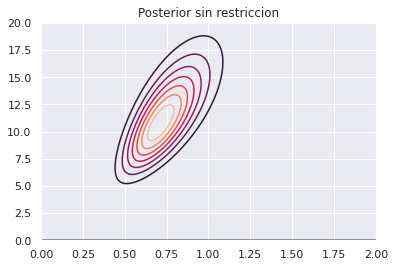

In [7]:
#Parametros   
n=30
alpha=3
beta=100
x=scipy.stats.gamma.rvs(a=alpha, size=n)/beta  #observaciones


m=1000
alpha =np.linspace(0, 2, m)
beta = np.linspace(0, 20, m)
Alpha, Beta = np.meshgrid(alpha, beta)
Z=auxpost(Alpha, Beta, x)
plt.contour(Alpha, Beta, Z)
plt.title( 'Posterior sin restriccion' )

Text(0.5, 1.0, 'Objetivo: Posterior con restriccion')

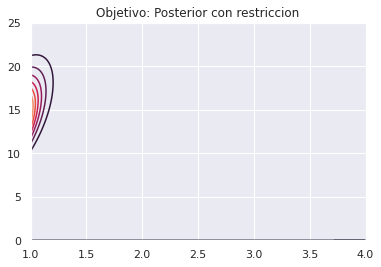

In [8]:
m=1000
alpha =np.linspace(1, 4, m)
beta = np.linspace(0, 25, m)
Alpha, Beta = np.meshgrid(alpha, beta)
Z=auxpost(Alpha, Beta, x)
plt.contour(Alpha, Beta, Z)
plt.title( 'Objetivo: Posterior con restriccion' )

Tasa de aceptacion:  0.0566


Text(0, 0.5, '$\\beta$')

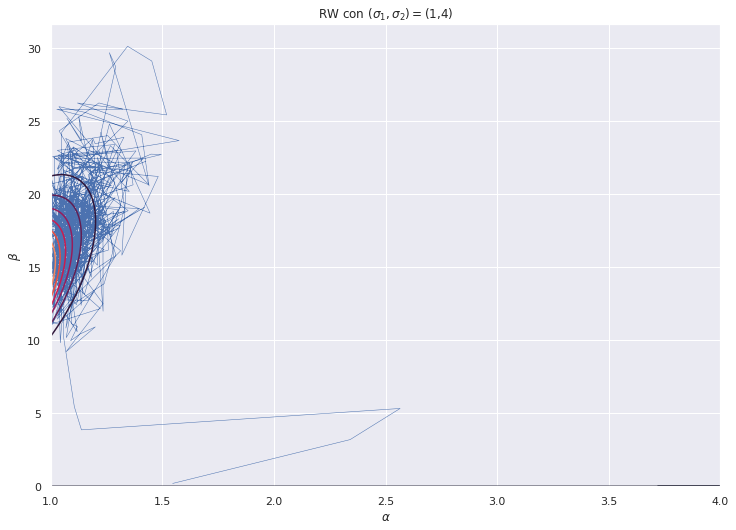

In [12]:
M=10000
s1=1
s2=4
alphas, betas=MH(x,M ,s1,s2)  

plt.figure(figsize=(12,8.5))
plt.contour(Alpha, Beta, Z)
plt.plot(alphas, betas, zorder=1, linewidth=0.5)
plt.title('RW con '+r'$(\sigma_1, \sigma_2)=$'+'('+str(s1)+','+str(s2)+')')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')


In [ ]:
np.mean(alphas)

1.052909111565189

In [ ]:
np.mean(betas)

9.424827686704695